Exploracion de Muestras

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
path=os.getcwd()
print (path)
filename=path+"\ISAACS2.CSV"
print(filename)

C:\Users\Usser\Estadistica Basica
C:\Users\Usser\Estadistica Basica\ISAACS2.CSV


In [4]:
tabla=pd.read_csv(r"C:\Users\Usser\Estadistica Basica\ISAACS2.CSV")

In [5]:
tabla

,XPT,YPT,ZPT,Gold,Copper,Rock,NoSample
0,11,8,0,-999.000000,-999.000000,2,1
1,8,30,0,-999.000000,-999.000000,2,2
2,9,48,0,224.199997,-999.000000,2,3
3,8,68,0,434.399994,-999.000000,2,4
4,9,90,0,412.100006,-999.000000,2,5
...,...,...,...,...,...,...,...
465,214,19,0,242.500000,15.600000,2,466
466,245,231,0,161.199997,26.100000,2,467
467,233,220,0,626.000000,959.700012,2,468
468,226,221,0,800.099976,1681.500000,2,469


Text(0.5, 0.98, 'Location Map for Gold and Copper Samples')

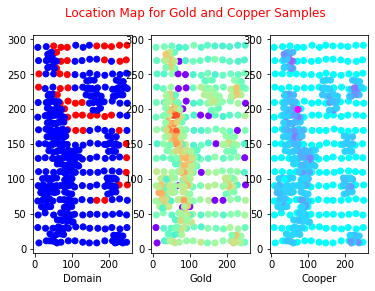

In [6]:

import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(1,3)

xloc,yloc,gold=tabla["XPT"],tabla["YPT"],tabla["Gold"]
ax[0].scatter(xloc,yloc,c=tabla["Rock"],cmap=cmap)
ax[1].scatter(xloc,yloc,c=gold,cmap='rainbow')
ax[2].scatter(xloc,yloc,c=tabla["Copper"],cmap='cool')
ax[0].set_xlabel("Domain")
ax[1].set_xlabel("Gold")
ax[2].set_xlabel("Cooper")

#ax[1].set_ylabel("Este")
ax[1].grid=True


fig.suptitle("Location Map for Gold and Copper Samples", color="red")


xloc,yloc,gold=tabla["XPT"],tabla["YPT"],tabla["Gold"]

Definir Puntos de Interporlacion

In [7]:
GoldVR=tabla[tabla["Gold"]>0]
GoldVR
xloc,yloc,gold=np.array(GoldVR["XPT"]),np.array(GoldVR["YPT"]),np.array(GoldVR["Gold"])
X, Y = np.meshgrid(xloc, yloc)
type(xloc)

numpy.ndarray

In [8]:
points = list(zip(GoldVR.XPT,GoldVR.YPT))
values = GoldVR.Gold.values
print(points[:5])
print(values[:5])



[(9, 48), (8, 68), (9, 90), (10, 110), (9, 129)]
[224.199997  434.3999939 412.1000061 587.2000122 192.3000031]


In [9]:
#define raster resolution
rRes = 15

In [10]:
#create coord ranges over the desired raster extension
xRange = np.arange(GoldVR.XPT.min(),GoldVR.XPT.max()+rRes,rRes)
yRange = np.arange(GoldVR.YPT.min(),GoldVR.YPT.max()+rRes,rRes)
print(xRange[:5],yRange[:5])

[ 8 23 38 53 68] [ 8 23 38 53 68]


In [11]:
#create arrays of x,y over the raster extension
gridX,gridY = np.meshgrid(xRange, yRange)

In [12]:
#interpolate over the grid usando el metodo lineal
from scipy.interpolate import griddata
gridZ0 = griddata(points, values, (gridX,gridY), method='nearest')
gridZ1 = griddata(points, values, (gridX,gridY), method='linear')
gridZ2 = griddata(points, values, (gridX,gridY), method='cubic')

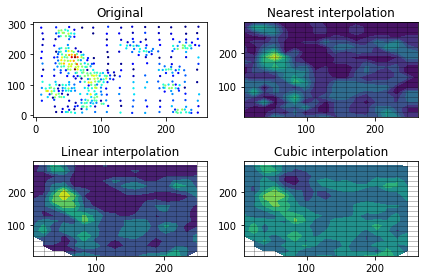

In [13]:
# Set up the figure
fig, axs = plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()

#PLotea los puntos originales
#axs[0].plot(GoldVR.XPT, GoldVR.YPT,'k.', ms=5)
axs[0].scatter(GoldVR.XPT, GoldVR.YPT,s=1.5,c=gold,cmap='jet')
axs[0].set_title("Original")

#Plot para la interpolacion Nearest

cs1=axs[1].contourf(gridX, gridY, gridZ0,10) # Pintamos 10 niveles con relleno
#cs2 = axs[1].contour(gridX, gridY, gridZ0, cs1.levels, colors='k') #pintar de negro los niveles
axs[1].plot(gridX, gridY,'k-', lw=0.5, alpha=0.5) 
axs[1].plot(gridX.T, gridY.T, 'k-', lw=0.5, alpha=0.5)
axs[1].set_title("Nearest interpolation")

#Plot para la interpolacion Lineal
axs[2].contourf(gridX, gridY, gridZ1,5)
axs[2].plot(gridX, gridY, 'k-', lw=0.5, alpha=0.5)
axs[2].plot(gridX.T, gridY.T, 'k-', lw=0.5, alpha=0.5)
axs[2].set_title("Linear interpolation")

#Plot para la interpolacion Cubic
axs[3].contourf(gridX, gridY, gridZ2,5)
axs[3].plot(gridX, gridY, 'k-', lw=0.5, alpha=0.5)
axs[3].plot(gridX.T, gridY.T, 'k-', lw=0.5, alpha=0.5)
axs[3].set_title("Cubic interpolation")

#Acomodo de Figura para que no se superpongan en titulos
fig.tight_layout()
